In [1]:
import numpy as np

from astropy import units as u
from astropy import constants as const

from scipy.integrate import quad
from scipy.optimize import minimize

import matplotlib.pyplot as plt

$$\large
\psi(z) = Ge^{\kappa z} \quad \text{for} \quad z < -\frac{L}{2}
$$

$$\large
\psi(z) = Asin(kz) + Bcos(kz) \quad \text{for} \quad -\frac{L}{2} \leq z \leq \frac{L}{2}
$$

$$\large
\psi(z) = Fe^{-\kappa z} \quad \text{for} \quad z > \frac{L}{2}
$$



In [2]:
# If F == G, A=0, even functions.  Same value is on each side of center

# If F != G, B=0, odd functions.  Opposite value is on each side of center


def defineWell(x, L, v):
    well = np.zeros_like(x)
    well[x<-L/2]=v
    well[x>L/2]=v
    return well
    
def psi_even(x, L, v, e):
    k = np.pi/L*np.sqrt(e)
    kappa = np.pi/L*np.sqrt(v-e)
    
    G = np.cos(k*-L/2) / np.exp(kappa*-L/2)
    F = np.cos(k*L/2) / np.exp(-kappa*L/2)
    
    psi_values = np.zeros_like(x)
    
    psi_values = np.cos(k*x)
    psi_values[x<-L/2] = G*np.exp(kappa*x[x<-L/2])
    psi_values[x>L/2] = F*np.exp(-kappa*x[x>L/2])
    
    return psi_values+e

def psi_odd(x, L, v, e):
    k = np.pi/L*np.sqrt(e)
    kappa = np.pi/L*np.sqrt(v-e)
    
    G = np.sin(k*-L/2) / np.exp(kappa*-L/2)
    F = np.sin(k*L/2) / np.exp(-kappa*L/2)
    
    psi_values = np.zeros_like(x)
    
    psi_values = np.sin(k*x)
    psi_values[x<-L/2] = G*np.exp(kappa*x[x<-L/2])
    psi_values[x>L/2] = F*np.exp(-kappa*x[x>L/2])
    
    return psi_values+e


# Find the Eigen Energies
def kappa_over_k (e, v):
    return np.sqrt((v-e)/e)

def even_eigen_eq (e, v):
    return np.tan(np.pi/2*np.sqrt(e))

def odd_eigen_eq (e, v):
    return -1/np.tan(np.pi/2*np.sqrt(e))

def abs_diff_even_eigen(e, v):
    return np.abs(kappa_over_k(e, v) - even_eigen_eq(e, v))

def abs_diff_odd_eigen(e, v):
    return np.abs(kappa_over_k(e, v) - odd_eigen_eq(e, v))

def get_eigenenergies(v, diff):
    # Grid search for the initial guesses
    initial_guesses = np.linspace(0.01, v, 100)

    solutions = []

    for guess in initial_guesses:
        result = minimize(diff, guess, args=(v,), bounds=[(0.01, v)])
        if result.success:
            if not any(np.isclose(sol, result.x, atol=1e-3) for sol in solutions):
                solutions.append(result.x[0])
    return solutions


# Generate an array of e values
#e_values = np.linspace(0.01, v, 1000)

# Calculate the function values
#kk_values = kappa_over_k(e_values, v)
#even_values = even_eigen_eq(e_values, v)
#odd_values = odd_eigen_eq(e_values, v)

# Plot the functions
#plt.plot(e_values, kk_values, label='sqrt(v - e/e)')
#plt.plot(e_values, even_values, label='tan(pi/2*sqrt(e))')
#plt.plot(e_values, odd_values, label='cot(pi/2*sqrt(e))')
#plt.ylim([-5, 5])  # restrict y-axis from -5 to 5
#plt.legend()
#plt.grid(True)
#plt.show()


In [9]:
# Set up the well
L = 1*u.nm
x = np.linspace(-1.5*L, 1.5*L, 1000)

m = const.m_e
E1 = (const.hbar**2/(2*m)*(np.pi/L)**2).to(u.eV)

v = 20
even_solutions = get_eigenenergies(v, abs_diff_even_eigen)
odd_solutions = get_eigenenergies(v, abs_diff_odd_eigen)

print(even_solutions)
print(odd_solutions)

[17.777639984387065, 0.7650640065176445, 6.782268310640183]
[20.0, 11.840929979709314, 3.04446876277913]


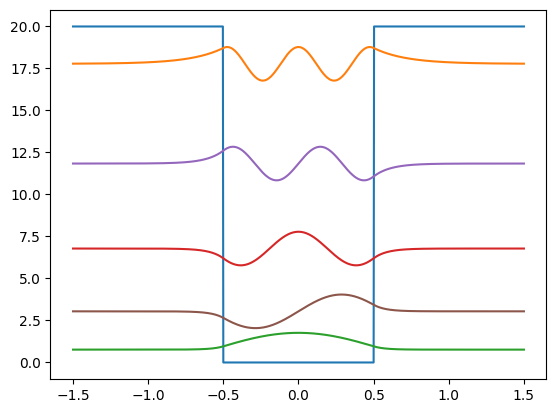

In [10]:
well = defineWell(x.value, L.value, v)
plt.plot(x, well)

for e in even_solutions:
    if (e < v):
        psi_values = psi_even(x.value, L.value, v, e)
        plt.plot(x, psi_values)
    
for e in odd_solutions:
    if (e < v):
        psi_values = psi_odd(x.value, L.value, v, e)
        plt.plot(x, psi_values)
    
